In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [36]:
df = pd.read_csv("forecasting_ready_1.csv")
df["Date"] = pd.to_datetime(df["Date"])

sku = df["SKU_ID"].unique()[1]

sku_df = df[df["SKU_ID"] == sku].sort_values("Date")

data = sku_df["Units_Sold"].values.reshape(-1,1)

In [37]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [38]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 30   # last 30 days predict next day

X, y = create_sequences(data_scaled, SEQ_LENGTH)

In [40]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [41]:
model = Sequential([
    LSTM(50, activation="relu", input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2319 - val_loss: 0.0566
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1412 - val_loss: 0.0282
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0656 - val_loss: 0.0063
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0185 - val_loss: 0.0076
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0118 - val_loss: 0.0051
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0111 - val_loss: 0.0048
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0087 - val_loss: 0.0045
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0075 - val_loss: 0.0047
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0066 - val_loss: 0.0053
Epoch 10/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 12/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0061 - val_loss: 0.0071
E

In [43]:
pred_scaled = model.predict(X_test)

pred = scaler.inverse_transform(pred_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [44]:
mae = mean_absolute_error(actual, pred)
rmse = np.sqrt(mean_squared_error(actual, pred))
mape = np.mean(np.abs((actual - pred) / actual)) * 100

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

MAE  : 11.35
RMSE : 14.47
MAPE : 14.39%


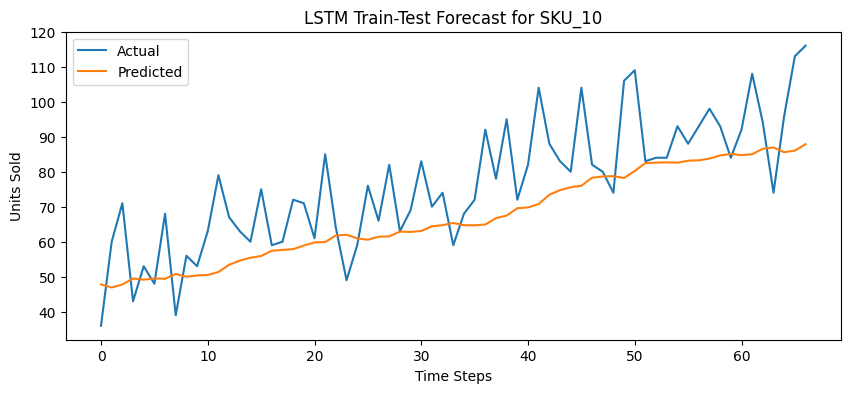

In [45]:
plt.figure(figsize=(10,4))
plt.plot(actual, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.title(f"LSTM Train-Test Forecast for {sku}")
plt.xlabel("Time Steps")
plt.ylabel("Units Sold")
plt.show()

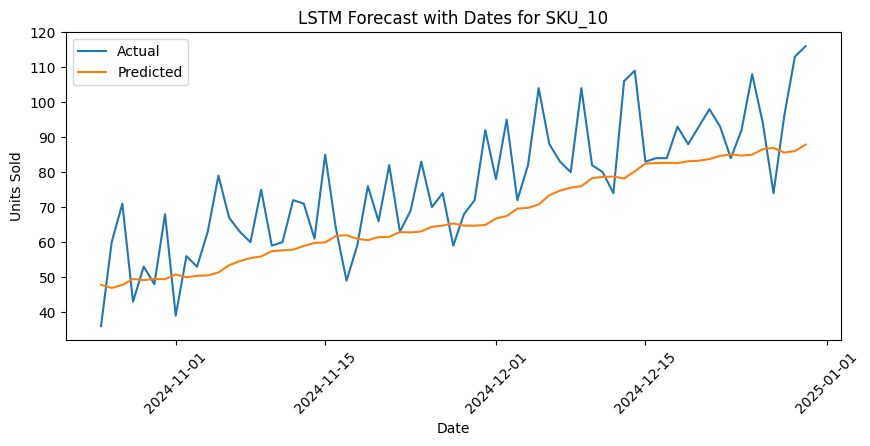

In [46]:
test_dates = sku_df["Date"].iloc[-len(actual):]

plt.figure(figsize=(10,4))
plt.plot(test_dates, actual, label="Actual")
plt.plot(test_dates, pred, label="Predicted")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.title(f"LSTM Forecast with Dates for {sku}")
plt.xticks(rotation=45)
plt.show()


above, it just trained on past 30 days data to predict next day's needs on around 11 units of error

next, use whole year data-> predict next month:

In [54]:
df = pd.read_csv("forecasting_ready_1.csv")
df["Date"] = pd.to_datetime(df["Date"])

sku = df["SKU_ID"].unique()[1]

sku_df = df[df["SKU_ID"] == sku].sort_values("Date")

values = sku_df["Units_Sold"].values.reshape(-1,1)

In [55]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

In [56]:
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

SEQ_LENGTH = 200

X, y = create_sequences(scaled, SEQ_LENGTH)

In [57]:
model = Sequential([
    LSTM(50, activation="relu", input_shape=(SEQ_LENGTH,1)),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")

model.fit(X, y, epochs=30, batch_size=32, verbose=1)

Epoch 1/30


c:\Users\Guest 1\Desktop\ttl-agentic-ai\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0427
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0244
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0113
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0065
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0073
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0063
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0061
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0059
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0058
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0057
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0055
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0054
Epoch 13/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0053
Epoch 14/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0052
Epoch 15/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0051
Epoch 16/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/

In [63]:
last_sequence = scaled[-SEQ_LENGTH:]

future_preds = []

current_seq = last_sequence.copy()

for _ in range(30):
    pred = model.predict(current_seq.reshape(1,SEQ_LENGTH,1), verbose=0)
    future_preds.append(pred[0,0])

    current_seq = np.append(current_seq[1:], pred, axis=0)

# Inverse scale
future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))

In [65]:
future_dates = pd.date_range(
    start=sku_df["Date"].max() + pd.Timedelta(days=1),
    periods=30,
    freq="D"
)

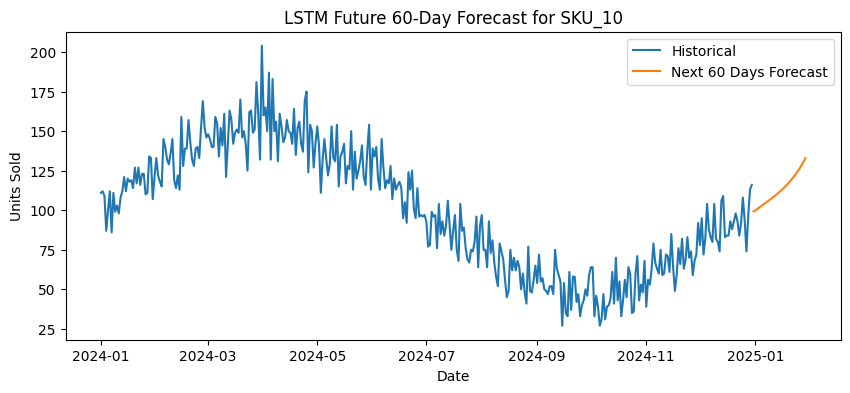

In [67]:
plt.figure(figsize=(10,4))
plt.plot(sku_df["Date"], sku_df["Units_Sold"], label="Historical")
plt.plot(future_dates, future_preds, label="Next 60 Days Forecast")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.title(f"LSTM Future 60-Day Forecast for {sku}")
plt.show()